In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [32]:
#input
x=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)

#Labels(4 sample,1 output)
y=np.array([[0],[0],[0],[1]],dtype=np.float32)

In [33]:
print("X shape:",x.shape)
print("Y shape:",y.shape)

X shape: (4, 2)
Y shape: (4, 1)


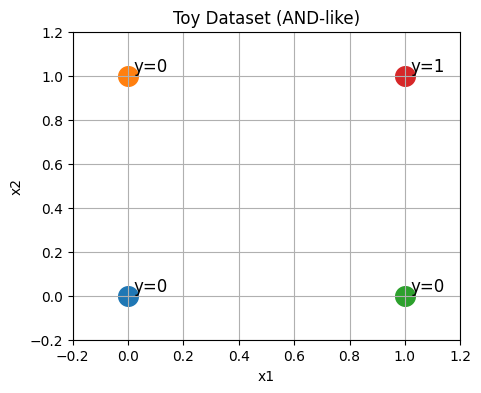

In [34]:
plt.figure(figsize=(5,4))
for i in range(len(x)):
    plt.scatter(x[i,0], x[i,1], s=200)
    plt.text(x[i,0]+0.02, x[i,1]+0.02, f"y={int(y[i,0])}", fontsize=12)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Toy Dataset (AND-like)")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.show()

In [35]:
np.random.seed(42)

#layer1: 2->4
w1=np.random.randn(2,4)*0.5
b1=np.zeros((1,4))

#layer2:4->1
w2=np.random.randn(4,1)*0.5
b2=np.zeros((1,1))


In [36]:
print("W1:",w1.shape,"b1:",b1.shape)
print("W2:",w2.shape,"b2:",b2.shape)

W1: (2, 4) b1: (1, 4)
W2: (4, 1) b2: (1, 1)


In [37]:
def relu(z):
  return np.maximum(0,z)
def relu_derivative(z):
  return (z>0).astype(float)
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [38]:
def binary_cross_entropy(y_true, y_pred, eps=1e-8):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [39]:
def forward_pass(x, w1, b1, w2, b2):
    # Hidden layer
    z1 = x @ w1 + b1
    a1 = relu(z1)

    # Output layer
    z2 = a1 @ w2 + b2
    y_hat = sigmoid(z2)

    cache = {"z1": z1, "a1": a1, "z2": z2, "y_hat": y_hat}
    return y_hat, cache

y_hat, cache = forward_pass(x, w1, b1, w2, b2)
print("Initial predictions (y_hat):\n", y_hat)
print("Initial loss:", binary_cross_entropy(y, y_hat))


Initial predictions (y_hat):
 [[0.5       ]
 [0.43233932]
 [0.42295211]
 [0.36458997]]
Initial loss: 0.7045476385965153


In [40]:
def backward_pass(x, y, cache, w1):
    z1, a1, y_hat = cache["z1"], cache["a1"], cache["y_hat"]

    # Output layer gradient
    dz2 = y_hat - y                        # (N,1)
    dw2 = a1.T @ dz2                       # (4,1)
    db2 = np.sum(dz2, axis=0, keepdims=True)  # (1,1)

    # Hidden layer gradient
    da1 = dz2 @ w2.T                       # (N,4)
    dz1 = da1 * relu_derivative(z1)        # (N,4)
    dw1 = x.T @ dz1                        # (2,4)
    db1 = np.sum(dz1, axis=0, keepdims=True)  # (1,4)

    grads = {"dW1": dw1, "db1": db1, "dW2": dw2, "db2": db2}
    return grads

grads = backward_pass(x, y, cache, w2)
for k,v in grads.items():
    print(k, v.shape)


dW1 (2, 4)
db1 (1, 4)
dW2 (4, 1)
db2 (1, 1)


In [43]:
def train_mlp(x, y, hidden_size=4, lr=0.1, epochs=5000, seed=42, print_every=500):
    np.random.seed(seed)

    # Initialize
    w1 = np.random.randn(x.shape[1], hidden_size) * 0.5
    b1 = np.zeros((1, hidden_size))
    w2 = np.random.randn(hidden_size, 1) * 0.5
    b2 = np.zeros((1, 1))

    losses = []

    for epoch in range(1, epochs+1):
        # Forward
        y_hat, cache = forward_pass(x, w1, b1, w2, b2)
        loss = binary_cross_entropy(y, y_hat)
        losses.append(loss)

        # Backward
        grads = backward_pass(x, y, cache, w2)

        # Update
        w1 -= lr * grads["dW1"]
        b1 -= lr * grads["db1"]
        w2 -= lr * grads["dW2"]
        b2 -= lr * grads["db2"]

        if epoch % print_every == 0 or epoch == 1:
            print(f"Epoch {epoch:4d} | Loss: {loss:.4f}")

    params = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}
    return params, losses

params, losses = train_mlp(x, y, hidden_size=4, lr=0.1, epochs=5000, print_every=500)


Epoch    1 | Loss: 0.7045
Epoch  500 | Loss: 0.0329
Epoch 1000 | Loss: 0.0117
Epoch 1500 | Loss: 0.0068
Epoch 2000 | Loss: 0.0048
Epoch 2500 | Loss: 0.0036
Epoch 3000 | Loss: 0.0029
Epoch 3500 | Loss: 0.0024
Epoch 4000 | Loss: 0.0021
Epoch 4500 | Loss: 0.0018
Epoch 5000 | Loss: 0.0016


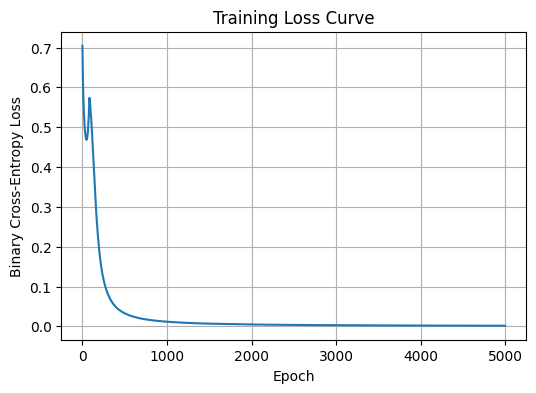

In [44]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [45]:
w1, b1, w2, b2 = params["w1"], params["b1"], params["w2"], params["b2"]

y_hat, _ = forward_pass(x, w1, b1, w2, b2)
pred = (y_hat >= 0.5).astype(int)

print("Final y_hat probabilities:\n", y_hat)
print("\nPredicted labels:\n", pred)
print("\nTrue labels:\n", y.astype(int))


Final y_hat probabilities:
 [[2.12332104e-06]
 [1.01759880e-03]
 [1.08586323e-03]
 [9.95650737e-01]]

Predicted labels:
 [[0]
 [0]
 [0]
 [1]]

True labels:
 [[0]
 [0]
 [0]
 [1]]
